<a href="https://colab.research.google.com/github/cyberseihis/bnnprint/blob/main/notebooks/rfe_naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Change from colab test

In [ ]:
%matplotlib inline

In [ ]:
from sklearn.feature_selection import RFECV,RFE
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as nps
import pandas as pd
import sklearn

In [ ]:
def smallfeatures(fname,shallplot=False):
  print(f"ATTENTION {fname}")
  df = pd.read_csv(fname+'.csv', header=None)
  Xd = df.iloc[:, :-1]
  y = df.iloc[:, -1]
  X = qfour(Xd)/16


  X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, test_size=0.3)
  
  rfe2 = DecisionTreeClassifier()

  rfe2.fit(X_train, y_train)
  print(f"insanity {rfe2.score(X_test,y_test)}")

  dtc = DecisionTreeClassifier()
  sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
  rfecv = RFECV(
    estimator=dtc,
    step=1,
    cv=sss,
    scoring="accuracy",
    min_features_to_select=1,
    n_jobs=-1,
    verbose=1
  )

  rfecv.fit(X, y)
  print(f"Optimal number of features: {rfecv.n_features_}")
  mean_scores = rfecv.cv_results_["mean_test_score"]
  best_mean = np.max(mean_scores)
  print(f"bestmean {best_mean}")
  # find the index of the first element in arr that is larger than const
  index = np.argmax(mean_scores >= best_mean-0.01)
  print(f"decent number of features: {index+1}")
  print(f"nextbestthing {mean_scores[index]}")
  rfe = RFE(
    estimator=DecisionTreeClassifier(),
    n_features_to_select=index+1
  )
  rfe.fit(X, y)
  
  
  less = rfe.transform(X)
  L_train, L_test, yl_train, yl_test = \
        sklearn.model_selection.train_test_split(less, y, test_size=0.3)
  rfe3 = DecisionTreeClassifier()

  rfe3.fit(L_train, yl_train)
  print(f"anity {rfe3.score(L_test,yl_test)}")
  les_df = pd.concat([pd.DataFrame(less),y],axis=1)
  les_df.to_csv(f"less_{fname}.csvl", header=False, index=False)
  if shallplot:
    droplot(rfecv,fname)

  

In [ ]:
def qnorm(Xa):
    return pd.DataFrame(Xa.apply(
                        lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
                        ).fillna(0)


def qfour(Xa):
    Xc = qnorm(Xa)
    Xb = np.round(Xc*16).astype(int)
    return np.minimum(15, Xb)

ATTENTION cardio
insanity 0.9184952978056427
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Optimal number of features: 11
bestmean 0.9144200626959249
decent number of features: 10
nextbestthing 0.9115987460815047
anity 0.8934169278996865


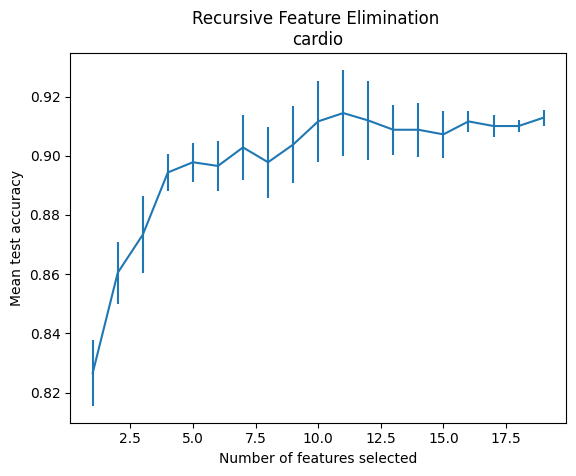

In [ ]:
smallfeatures("cardio",True)

In [ ]:
os.chdir('drive/MyDrive/colab notebooks/dataset')

ATTENTION Har
insanity 0.6485875706214689
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Optimal number of features: 8
bestmean 0.6736723163841808
decent number of features: 8
nextbestthing 0.6736723163841808
anity 0.6779661016949152


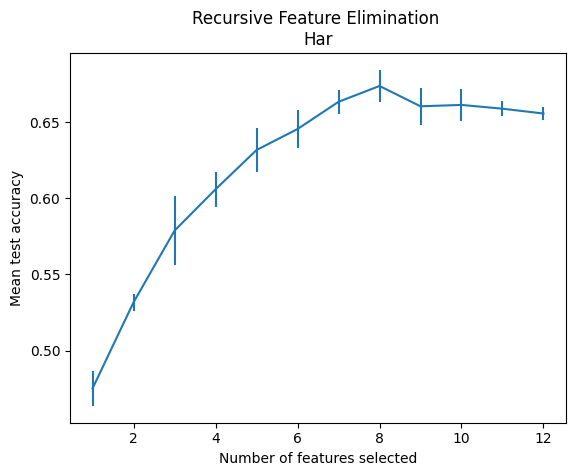

ATTENTION gasId
insanity 0.9784327821711
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 feature

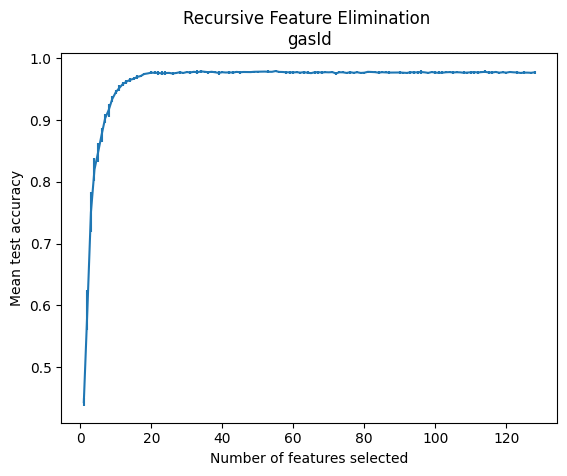

ATTENTION winequality_red
insanity 0.6145833333333334
Fitting estimator with 11 features.
Optimal number of features: 10
bestmean 0.6316666666666666
decent number of features: 10
nextbestthing 0.6316666666666666
anity 0.625


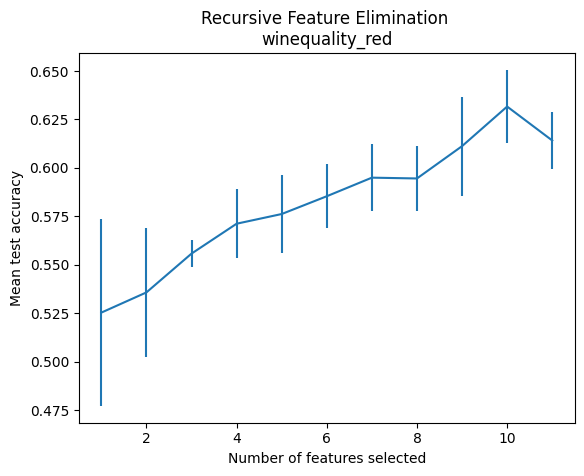

ATTENTION winequality_white
insanity 0.5938775510204082
Optimal number of features: 11
bestmean 0.5961904761904762
decent number of features: 9
nextbestthing 0.5917006802721089
anity 0.6156462585034014


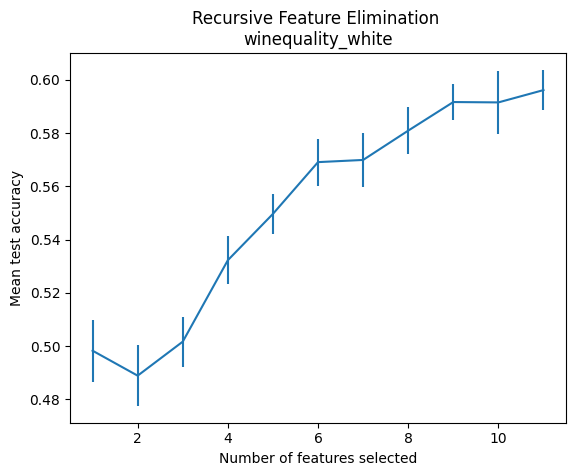

ATTENTION cardio
insanity 0.8730407523510971
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Optimal number of features: 11
bestmean 0.9122257053291536
decent number of features: 10
nextbestthing 0.9050156739811912
anity 0.9169278996865203


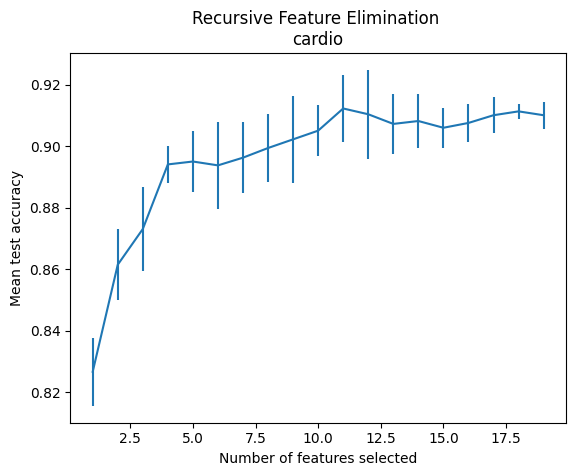

ATTENTION pendigits
insanity 0.9622054246331703
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Optimal number of features: 14
bestmean 0.9609604268563807
decent number of features: 10
nextbestthing 0.9517118719430858
anity 0.9524232992441085


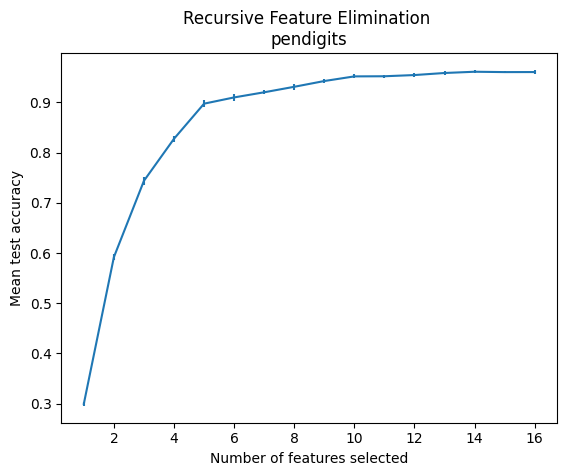

In [ ]:
import os
def get_csv_filenames():
    filenames = os.listdir()
    csv_filenames = [os.path.splitext(filename)[0] for filename in filenames if filename.endswith(".csv")]
    return csv_filenames

for fname in get_csv_filenames():
  smallfeatures(fname,True)

In [ ]:
rfecv.ranking_

array([81, 17,  1, 22, 28, 10, 37, 31,  1,  1,  7,  1,  1, 36, 27,  1,  1,
       15, 51,  1, 29, 48, 79, 65, 20,  1,  1, 56, 74, 18,  1, 26,  3,  1,
       13,  1, 30,  1,  6,  1, 47,  1, 76, 25, 24, 34, 66, 61,  1, 46, 38,
       32, 69, 57, 58, 21, 50, 59, 68, 72, 82, 80, 78,  5,  1, 11, 42,  1,
        1, 43,  2, 23, 14,  1,  1,  1,  1,  1,  1, 88,  1,  1,  1,  1, 19,
        1, 49, 39, 67, 60, 40, 71, 83, 35, 63, 64,  1,  1, 86,  1,  1, 45,
       12, 16,  1,  9, 77,  4, 33, 70, 54, 44,  1,  1, 41,  1,  8, 62, 52,
       53, 55,  1, 75,  1, 73, 84, 85, 87])

In [ ]:
import matplotlib.pyplot as plt
def droplot(rfecv,fname):
  scores = rfecv.cv_results_["mean_test_score"]
  n_scores = len(scores)
  plt.figure()
  plt.xlabel("Number of features selected")
  plt.ylabel("Mean test accuracy")
  plt.errorbar(
    range(1, n_scores + 1),
    scores,
    yerr=rfecv.cv_results_["std_test_score"],
  )
  plt.title(f"Recursive Feature Elimination \n{fname}")
  plt.show()


In [ ]:
import matplotlib.pyplot as plt
def qplot(scores):
  n_scores = len(scores)
  plt.figure()
  plt.xlabel("Number of features selected")
  plt.ylabel("Mean test accuracy")
  plt.errorbar(
    range(1, n_scores + 1),
    scores,
    
  )
  plt.title("Recursive Feature Elimination \nwith correlated features")
  plt.show()
